## Домашнее задание №3 (курс "Практикум по программированию на языке Python")

### Тема: Основы анализа данных и машинного обучения в Python.

#### Преподаватель: Мурат Апишев (mel-lain@yandex.ru)

**Выдана**:   14 апреля 2020

**Дедлайн**:   21:00 28 апреля 2020

**Среда выполнения**: Jupyter Notebook (Python 3.7)

#### Правила:

Результат выполнения задания - Jupyter Notebook с кодом и подробными ответами в случае теоретических вопросов. __Максимальное число баллов за задание - 20__.

Все ячейки должны быть "выполненными", при этом результат должен воспроизводиться при проверке (на Python 3.7). Если какой-то код не был запущен или отрабатывает с ошибками, то пункт не засчитывается. Задание, сданное после дедлайна, _не принимается_. Можно отправить недоделанное задание, выполненные пункты будут оценены.

Готовое задание отправляется на почту преподавателя.

Задание выполняется самостоятельно. Если какие-то студенты будут уличены в списывании, все они автоматически получат за эту работу 0 баллов. Если вы нашли в Интернете какой-то специфичный код, который собираетесь заимствовать, обязательно укажите это в задании - наверняка вы не единственный, кто найдёт и использует эту информацию.

Удалять фрагменты формулировок заданий запрещается.

#### Постановка задачи:

- В данной работе нужно решить ряд задач c использованиеv библиотек `numpy`, `pandas`, `sklearn` и `matplotlib`, а также дать ичерпывающие ответы на поставленные вопросы.
- В задачах 1-3 запрещается использовать циклы, генераторы списков и списковые включения, а также функции высшего порядка, необходимо написать тесты, проверяющие работу решения в обычных и крайних случаях.
- Даже если это не указано явно в требованиях, код должен быть по возможности неизбыточным, работать с разумной сложностью и объёмом потребялемой памяти, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.
- Результирующий код должен быть читаемым, с единой системой отступов и адеквантными названиями переменных, проверяющие могут снизить балл за задание, выполненное без учёта этого требования.

__Задание 1 (0.5 балла):__ Проверить, что все элементы входного массива строго положительны.

In [40]:
import numpy as np

def task_1(arr):
    return (arr > 0).all()

print(task_1(np.array([-1, 0, 1])))
print(task_1(np.array([0, 1])))
print(task_1(np.array([1, 2, 3, 4, 5])))

False
False
True


__Задание 2 (0.5 балла):__ В векторе повторить все значения `n` раз. Пример: для массива `[1, 2, 3]` и `n` равного 3 ответом должен быть массив `[1, 1, 1, 2, 2, 2, 3, 3, 3]`.

In [362]:
import numpy as np

def task_2(arr, n):
    return np.repeat(arr, repeats = n, axis = 0)

print(task_2([1,2,3], 3))
print(task_2([1],5))
print(task_2([9, 8, 7], 5))

[1 1 1 2 2 2 3 3 3]
[1 1 1 1 1]
[9 9 9 9 9 8 8 8 8 8 7 7 7 7 7]


__Задание 3 (1 балл):__ Для векторов `V` и `v` построить вектор, в котором на 0-й позиции будет находиться сумма первых `v[0]` элементов вектора `V`, на 1-й - следующих `v[1]` элементов, и т.д. Гарантируется, что элементов в `V` достаточное количество. Пример: для массивов `V=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` и `v=[2, 1, 3]` ответом будет `[3, 3, 15]`.

In [21]:
import numpy as np

def task_3(V, v):
    if(sum(v) > len(V)):
        raise ValueError(f'Vector V does not contain {sum(v)} elements, only  {len(V)}')
    return np.vectorize(np.sum)(np.array(np.array_split(V,np.cumsum(v))[:len(v)]))
    
print(task_3([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [2, 1, 3]))
print(task_3([10, 9, 8, 7, 6, 5, 4, 3, 2, 1], [4, 2]))
print(task_3([10, 1, 9, 2, 8, 3, 7, 4, 6, 5], [3, 2, 5]))

[ 3  3 15]
[34 11]
[20 10 25]


Для следующих нескольких заданий потребуются данные. Скачайте датасет, описывающий различные автомобили, из [репозитория UCI](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/vehicle/).

Соберите из `.dat` файлов один файл `car_data.csv`, который и будет использоваться далее. Будем решать задачу многоклассовой классификации, Везде, где это требуется, используйте подход One-vs-Rest.

Запустите следующий код на полученном файле с данными.

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(752, 18) (752,)
(488, 18) (488,) (264, 18) (264,)


__Задание 4 (1.5 балла):__ Воспользуйтесь возможностями библиотеки pandas для того, чтобы произвести базовый анализ данных. Обоснованно ответьте на следующие вопросы/решите задачи:

- сколько признаков в данных, каких они типов?
- имеются ли пропущенные значения?
- для каждого числового признака посчитайте его среднее значение и стандартное отклонение

In [86]:
dataframe = pd.DataFrame(data)
print(f'Count features = {len(dataframe.dtypes)}')
print(f'Types features = {dataframe.dtypes.unique()}')
print(f'Count missing values = {dataframe.isnull().sum().sum()}')
dataframe.describe()[1:3]

Count features = 18
Types features = [dtype('int32')]
Count missing values = 0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
mean,93.771277,44.938830,82.267287,169.275266,61.769947,8.643617,169.287234,40.813830,20.615691,148.196809,189.242021,442.240691,175.207447,72.570479,6.406915,12.515957,188.889628,195.56117
std,8.277531,6.112482,15.653764,33.501436,8.117578,4.813221,33.302670,7.752491,2.600813,14.321256,31.609425,177.747354,32.513556,7.591630,4.924123,8.845456,6.105142,7.43379


__Задание 5 (1 балл):__ Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [97]:
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

corralation_matrix = dataframe.corr().abs()
print(corralation_matrix)
upper_triangle = corralation_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
columns_to_drop = [column for column in upper.columns if any(upper_triangle[column] > 0.95)]

X = dataframe.drop(df[to_drop], axis=1)
X = preprocessing.scale(X)

print(X)

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(["bus", "saab", "van", "opel"])
label_encoder_target = label_encoder.transform(target)
label_target = label_binarize(label_encoder_target, classes=[0, 1, 2, 3])

          0         1         2         3         4         5         6   \
0   1.000000  0.688184  0.792710  0.679852  0.069446  0.119471  0.812885   
1   0.688184  1.000000  0.794889  0.611595  0.132312  0.221390  0.858735   
2   0.792710  0.794889  1.000000  0.762259  0.139917  0.234582  0.904241   
3   0.679852  0.611595  0.762259  1.000000  0.661438  0.446700  0.724821   
4   0.069446  0.132312  0.139917  0.661438  1.000000  0.668965  0.080679   
5   0.119471  0.221390  0.234582  0.446700  0.668965  1.000000  0.136052   
6   0.812885  0.858735  0.904241  0.724821  0.080679  0.136052  1.000000   
7   0.789413  0.827298  0.910954  0.781066  0.159754  0.150871  0.973375   
8   0.812413  0.857304  0.892238  0.697873  0.055534  0.130622  0.992204   
9   0.671334  0.964645  0.771419  0.560305  0.114940  0.282083  0.807589   
10  0.760821  0.804640  0.857903  0.790119  0.262391  0.302118  0.948343   
11  0.817808  0.850859  0.885907  0.711177  0.066287  0.114038  0.996308   
12  0.580971

In [ ]:
С данными произведены следующие действия: Построена матрица корреляции признаков. Признаки с коэфициентом корреляции более 0.95
    (cov > 0.95), удалены (сделано на основе кода, взятого отсюда: https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on).
Данные нормализованы.(сделано на основе примера отсюда http://datascientist.one/machine-learning-algorithms-python/).
Для обработки каждой категории поставлено в соответствие число(bus = 0, saab = 1, van = 2, opel = 3).

__Задание 6 (2.5 балла):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (не переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search хватит). Постройте график ROC-кривой для данного классификатора, кривой Precision-Recall, оцените точность классификации и f1-score с разными порогами вероятности отнесения к классу. 

Mode_params:
{'estimator__cv': 10, 'estimator__error_score': nan, 'estimator__estimator__C': 1.0, 'estimator__estimator__class_weight': None, 'estimator__estimator__dual': False, 'estimator__estimator__fit_intercept': True, 'estimator__estimator__intercept_scaling': 1, 'estimator__estimator__l1_ratio': None, 'estimator__estimator__max_iter': 100, 'estimator__estimator__multi_class': 'ovr', 'estimator__estimator__n_jobs': None, 'estimator__estimator__penalty': 'l2', 'estimator__estimator__random_state': None, 'estimator__estimator__solver': 'liblinear', 'estimator__estimator__tol': 0.0001, 'estimator__estimator__verbose': 0, 'estimator__estimator__warm_start': False, 'estimator__estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
         

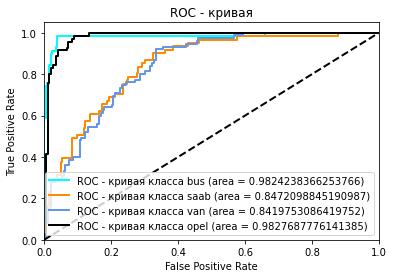

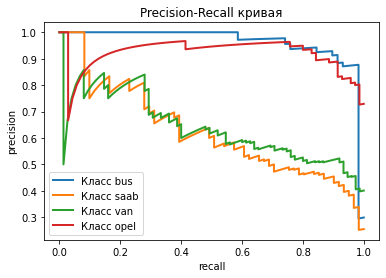

f1-score = [0.9        0.51428571 0.55639098 0.89361702]
accuracy_score: 0.5984848484848485


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  make_scorer
from sklearn.metrics import accuracy_score, roc_curve, auc,precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

targets = ["bus", "saab", "van", "opel"]
dict_tests = {"bus":0}

X_train, X_test, y_train, y_test = train_test_split(X, label_target, test_size=0.35)

model = OneVsRestClassifier(GridSearchCV(LogisticRegression(solver='liblinear', multi_class='ovr'),
                     cv=10,
                     param_grid={"C": [0.5, 1.0, 10.0, 100.0]},
                     scoring=make_scorer(f1_score, **{'average':'macro'})))

model.fit(X_train, y_train)
print("Mode_params:")
print(model.get_params())


count_classes = label_target.shape[1]
features = model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(count_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], features[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
lw = 2
colors = list(['aqua', 'darkorange', 'cornflowerblue','black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label=f'ROC - кривая класса {targets[i]} (area = {roc_auc[i]})')

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - кривая')
plt.legend(loc="lower right")
plt.show()

precision = dict()
recall = dict()
for i in range(count_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        features[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Класс {targets[i]}')

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("Precision-Recall кривая")
plt.show()

print(f'f1-score = {f1_score(y_test, model.predict(X_test), average=None)}')
print("accuracy_score:", accuracy_score(y_test, model.predict(X_test)))

__Задание 7 (1.5 балла):__ Одним из методов понижения размерности данных является линейное преобразование PCA (метод главных компонент), идея которого заключается в том, чтобы спроецировать выборку на подпространство из тех признаков, по которым значение дисперсии наиболее велико.

- Ознакомьтесь с данным методом, затем примените реализацию из `sklearn` к обучающей выборке (train).
- Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент. 
- Визуализируйте данные в пространстве первых двух главных компонент.

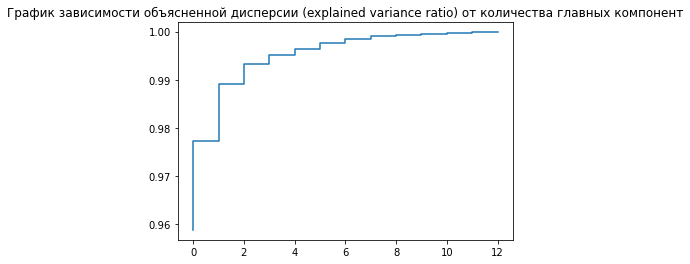

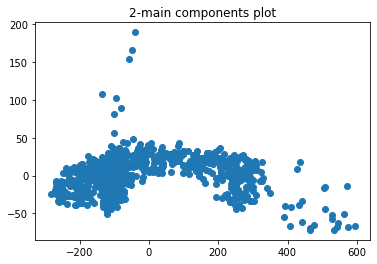

In [105]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=13)
data_pca = pca.fit_transform(data)

cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.title("График зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент")
plt.show()

pca = decomposition.PCA(n_components=2)
data_double = pca.fit_transform(data)

plt.scatter(data_double[:, 0], data_double[:, 1])
plt.title("Данные в пространстве первых двух главных компонент")
plt.show()

In [ ]:
Комменатрий: сделано на основе https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

__Задание 8 (0.5 балла):__ Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор. Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`)

In [108]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca_test = pca.fit_transform(X_test)
pca_train = pca.fit_transform(X_train)

__Задание 9 (1 балл):__ Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете. Постройте график ROC-кривой для полученных классификаторов, кривой Precision-Recall, оцените точность классификации и f1-score. 

In [370]:
pass

Для следующих заданий потребуется синтетическая выборка.

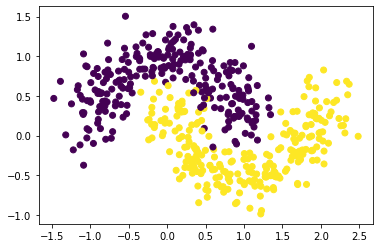

In [2]:
%matplotlib inline

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

__Задание 10 (1 балл):__ Попробуйте обучить на этих данных линейный SVM (используйте класс `svm.SVC`), померяйте качество в терминах метрик, рассмотренных выше. Изобразите разделяющую прямую (смотрите примеры в документации `sklearn`). Какие есть проблемы?

In [ ]:
pass

__Задание 11 (2.5 балл):__ Применим ядровой переход. Попробуйте перебрать различные ядра (полиномиальное, rbf, сигмоидальное) и важные для них гиперпараметры, оптимизируя f1-меру на обучающих данных. Нарисуйте соответствующие графики зависимости качества от значений разных параметров. Для наилучшего набора измерьте/изобразите все описанные в предыдущих заданиях метрики (на тестовой выборке). Изобразите итоговую разделяющую поверхность для лучшего решения на всей выборке.

Ответьте на следующие вопросы:
- как изменилось качество классификации на тесте?
- какая степень полиномиального ядра оказалась лучшей? Почему?

In [ ]:
pass

__Задание 12 (1.5 балл):__ Такого рода задачу можно решить и с помощью линейного классификатора, например, лог-регресии. Здесь может помочь генерация нового признакового пространства путём использования полиномиальных признаков (посмотрите класс `PolynomialFeatures` в `sklearn`). Сгенерируйте новые признаки (попробуйте разные степени), обучите на них лог-регрессию и померяйте качество в терминах описанных выше метрик. Какая степень оказалась наилучшей с точки зрения качества на тесте? Сравните с результатами ядрового SVM с полиномиальным ядром с той же степенью.

In [ ]:
pass

В этой секции мы поработаем с датасетом Human Activity Recognition (HAR). Данные доступны в [репозитории UCI](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones). Скачайте их и поместите директорию `data` в одной директории с этим ноутбуком. Доступны сырая и предобработанная версии данных, в этой части задания мы будем работать с предобработанными.

Выберите одну из библиотек для градиентного бустинга, которой вы воспользуетесь в дальнейшем (если есть желание, можете попробовать все, это полезно):

- LightGBM by Microsoft. [Link to github](https://github.com/Microsoft/LightGBM).
- xgboost by dlmc. [Link to github](https://github.com/dmlc/xgboost).
- Catboost by Yandex. [Link to github](https://github.com/catboost/catboost).

Реализацию Random Forest возьмите из `sklearn`.

__Задание 13 (5 баллов):__ Предобработайте данные, используя информацию с лекций/семинаров, после чего примените к предобработанному датасету случайный лес и градиентный бустинг. Основной задачей является достижение не менее 85% точности классификации на тестовых данных. Детали:

- изучите смысл и состав признаков, нет ли признаков, являющихся лишними или вредными? Ответ поясните
- вспомните про метод главных компонент, не мог бы он помочь в этой задаче?
- для получения нужного качества модели нужно аккуратно настраивать. Процесс настройки (с перебором гиперпараметров по сетке) отобразите в виде графиков зависимости качества от гиперпараметров

При выставлении баллов за это задание будет оцениваться как качество решения, так и полнота/корректность опробованных идей и методов.

In [ ]:
X_train = np.genfromtxt('data/train/X_train.txt')
y_train = np.genfromtxt('data/train/y_train.txt')

X_test = np.genfromtxt('data/test/X_test.txt')
y_test = np.genfromtxt('data/test/y_test.txt')

with open('data/activity_labels.txt', 'r') as iofile:
    activity_labels = iofile.readlines()

activity_labels = [x.replace('\n', '').split(' ') for x in activity_labels]
activity_labels = dict([(int(x[0]), x[1]) for x in activity_labels])

In [ ]:
pass